In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
prime = pd.read_csv("amazon_prime_titles.csv")
prime

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [4]:
print(prime.shape)
prime.info()

(9668, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [5]:
prime.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [6]:
prime.isna().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
prime['director'].fillna('Unknown',inplace=True)
prime['cast'].fillna('Unknown',inplace=True)
prime['country'].fillna('Unknown',inplace=True)
prime['date_added'].fillna('Unknown',inplace=True)

In [8]:
prime.isna().sum()

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added        0
release_year      0
rating          337
duration          0
listed_in         0
description       0
dtype: int64

In [9]:
prime['rating'].unique()

array([nan, '13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+',
       'TV-PG', '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G',
       'PG', 'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

In [10]:
prime['rating'].fillna('UNRATED',inplace=True)

In [11]:
prime.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Types of Content

In [12]:
prime['type'].value_counts()

type
Movie      7814
TV Show    1854
Name: count, dtype: int64

In [13]:
prime['type'].value_counts().values

array([7814, 1854], dtype=int64)

In [14]:
prime['type'].value_counts().index

Index(['Movie', 'TV Show'], dtype='object', name='type')

In [15]:
prime['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

Text(0.5, 1.0, 'Type of Content')

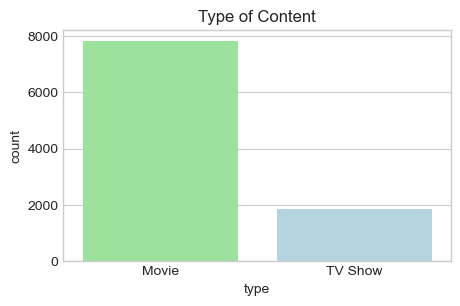

In [16]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(5,3))
sns.countplot(x = 'type',data = prime,palette=['lightgreen','lightblue'])
plt.title("Type of Content")

In [17]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

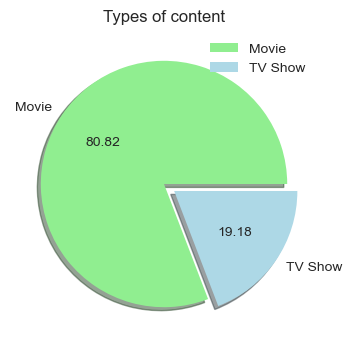

In [18]:
plt.figure(figsize=(6,4))
plt.pie(x = prime['type'].value_counts().values,
        labels= prime['type'].value_counts().index,
        autopct = '%.2f',
        colors=['lightgreen','lightblue'],
        shadow = True ,
        explode = [0.0,0.1])
plt.title("Types of content")
plt.legend()
plt.show()

# Release Year(History of decade)

In [19]:
prime['release_year'].unique()

array([2014, 2018, 2017, 1989, 2016, 1994, 2020, 2019, 2008, 2001, 1941,
       1991, 2005, 2015, 2011, 2013, 1949, 2007, 2002, 1955, 1959, 1983,
       2009, 2012, 2010, 1986, 1988, 1920, 1936, 1992, 2021, 1993, 2006,
       1948, 1946, 1944, 1935, 1985, 1937, 1970, 1945, 1939, 1996, 1997,
       1974, 1938, 1978, 2004, 1943, 1975, 1960, 1934, 1940, 1961, 2003,
       2000, 1967, 1995, 1951, 1932, 1999, 1963, 1969, 1952, 1947, 1929,
       1990, 1925, 1968, 1987, 1942, 1979, 1980, 1981, 1976, 1966, 1973,
       1956, 1972, 1950, 1953, 1982, 1977, 1933, 1958, 1984, 1998, 1924,
       1922, 1926, 1954, 1930, 1971, 1965, 1931, 1923, 1962, 1964, 1957,
       1927], dtype=int64)

In [20]:
prime[prime['release_year']>=2013]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,UNRATED,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,UNRATED,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,UNRATED,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
6,s7,Movie,Hired Gun,Fran Strine,"Alice Cooper, Liberty DeVitto, Ray Parker Jr.,...",United States,"March 30, 2021",2017,UNRATED,98 min,"Documentary, Special Interest","They are the ""First Call, A-list"" musicians, j..."
...,...,...,...,...,...,...,...,...,...,...,...,...
9657,s9658,Movie,A Place at the Table,"Kristi Jacobson, Lori Silverbush","Jeff Bridges, Tom Colicchio",Unknown,Unknown,2013,PG,84 min,"Documentary, Special Interest",The next chapter on America's food crisis from...
9660,s9661,Movie,The Man in the Hat,"John-Paul Davidson, Stephen Warbeck","Ciaran Hinds, Stephen Dillane, Maïwenn",Unknown,Unknown,2021,13+,96 min,Comedy,The Man in the Hat journeys through France in ...
9662,s9663,Movie,River,Emily Skye,"Mary Cameron Rogers, Alexandra Rose, Rob Marsh...",Unknown,Unknown,2021,16+,93 min,"Drama, Science Fiction, Suspense","River is a grounded Sci-Fi mystery Thriller, t..."
9664,s9665,TV Show,Planet Patrol,Unknown,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",Unknown,Unknown,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."


In [21]:
last_decade = prime[["type","release_year"]]
last_decade = last_decade.rename(columns = {"release_year":"Release Year"})

In [22]:
last_decade = last_decade[last_decade["Release Year"] >= 2013]
last_decade

,type,Release Year
0,Movie,2014
1,Movie,2018
2,Movie,2017
3,Movie,2014
6,Movie,2017
...,...,...
9657,Movie,2013
9660,Movie,2021
9662,Movie,2021
9664,TV Show,2018


In [23]:
last_decade_df = last_decade.groupby("Release Year")['type'].count().reset_index()
last_decade_df = pd.DataFrame(last_decade_df)
last_decade_df 

,Release Year,type
0,2013,289
1,2014,391
2,2015,378
3,2016,521
4,2017,562
5,2018,623
6,2019,929
7,2020,962
8,2021,1442


In [24]:
last_decade_df.rename(columns={"type":'Total content'},inplace = True)

In [25]:
last_decade_df

,Release Year,Total content
0,2013,289
1,2014,391
2,2015,378
3,2016,521
4,2017,562
5,2018,623
6,2019,929
7,2020,962
8,2021,1442


In [26]:
last_decade.groupby("Release Year")["type"].value_counts()

Release Year  type   
2013          Movie       227
              TV Show      62
2014          Movie       295
              TV Show      96
2015          Movie       282
              TV Show      96
2016          Movie       402
              TV Show     119
2017          Movie       404
              TV Show     158
2018          Movie       438
              TV Show     185
2019          Movie       730
              TV Show     199
2020          Movie       736
              TV Show     226
2021          Movie      1139
              TV Show     303
Name: count, dtype: int64

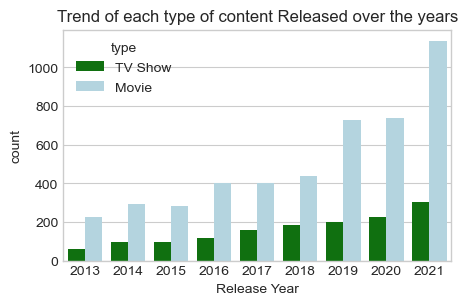

In [27]:
plt.figure(figsize=(5,3))
sns.countplot(x = "Release Year",data = last_decade,hue = "type",palette = ['green','lightblue'])
plt.title("Trend of each type of content Released over the years")
plt.show()

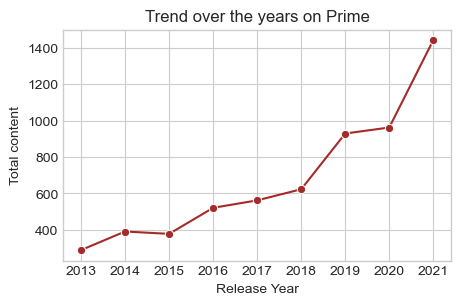

In [28]:
plt.figure(figsize=(5,3))
sns.lineplot(x ='Release Year',y= "Total content",data = last_decade_df,color = 'brown',marker = 'o')
plt.title("Trend over the years on Prime")
plt.show()

# Countries

In [29]:
#prime
top10_cnt = prime['country'].value_counts().head(10)
top10_cnt = pd.DataFrame(top10_cnt)
top10_cnt

,count
country,
Unknown,8996
United States,253
India,229
United Kingdom,28
Canada,16
"United Kingdom, United States",12
Spain,8
Italy,8
"Canada, United States",7


### we not including Unknown country CONTENT

Text(0.5, 1.0, 'Content From different countries')

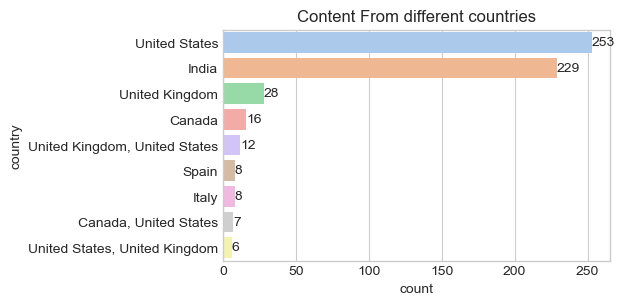

In [30]:
plt.figure(figsize=(5,3))
plot = sns.barplot(x = 'count',y = 'country',data= top10_cnt[1:],hue ="country",palette="pastel")
for i in plot.containers:
    plot.bar_label(i)
plt.title("Content From different countries")

ANALYSIS1: Maximum Content are uploaded from Unknown Countries 

ANALYSIS2:Then after mentioned countries maximum Content are uploaded from  United states (alone contribution of 37.64% in comparision to other mentioned countries)

# Rating

In [31]:
prime["rating"].unique()

array(['UNRATED', '13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+',
       'TV-PG', '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G',
       'PG', 'NC-17', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

In [33]:
def cR(rate):
    new_rating={
        'UNRATED':  'General Audience',
        '13+':'Teens' ,
        'ALL':  'General Audience',
        '18+': 'Mature Audience' ,
        'R': 'Mature Audience',
        'TV-Y' : 'General Audience',
        'TV-Y7': 'Teens',
        'NR': 'Mature Audience',
        '16+':'Teens' ,
        'TV-PG':  'Teens',
        '7+': 'kids',
        'TV-14':'Teens' ,
        'TV-NR': 'Mature Audience',
        'TV-G' : 'General Audience',
        'PG-13' :'Teens' ,
        'TV-MA' : 'Mature Audience' ,
        'G': 'General Audience',
        'PG': 'General Audience',
        'NC-17' :'Mature Audience' ,
        '16': 'General Audience', 
        'AGES_16_': 'Teens',
        'AGES_18_': 'Mature Audience',
        'ALL_AGES':  'General Audience',
        'NOT_RATE':  'General Audience'
    }
    return new_rating.get(rate,'Unknown')
prime['rating'] = prime['rating'].apply(cR)
prime.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3525,s3526,Movie,15-Minute Lower Strength Focus 5.0 Workout,Unknown,Maggie Binkley,Unknown,Unknown,2017,General Audience,18 min,Fitness,No Equipment Needed. Tip: Complete Series 1.0 ...
3453,s3454,Movie,6-Headed Shark Attack,Mark Atkins,"Brandon Auret, Cord Newman, Thandi Sebe",Unknown,Unknown,2018,Teens,89 min,"Action, Science Fiction",What is supposed to be a marriage boot camp on...
9001,s9002,TV Show,Roadkill Garage,Unknown,Unknown,Unknown,Unknown,2017,Mature Audience,1 Season,"Sports, Unscripted",Roadkill Garage
9403,s9404,Movie,Northmen: A Viking Saga,Claudio Fäh,"Charlie Murphy, Ed Skrein, James Norton, Ryan ...",Unknown,Unknown,2015,Mature Audience,98 min,Action,When a storm decimates their longboat and stra...
792,s793,Movie,Tenkai Knights - Rise of the Knights,Mitsuru Hongo,"Brian Beacock, Steven J. Blum, Johnny Yong Bos...",Unknown,Unknown,2014,General Audience,72 min,"Anime, Kids","Ripped through space and time, four teenagers ..."
5385,s5386,Movie,Trishna,Anil Ganguly,"Shashi Kapoor, Sanjeev Kumar, Rakhee Gulzar, B...",Unknown,Unknown,1978,Teens,125 min,Drama,"Aarti, the wife of a wealthy doctor, accidenta..."
3783,s3784,Movie,Resurrection of Jake The Snake,Steve Yu,"Jake the Snake Roberts, Diamond Dallas Page, S...",United States,Unknown,2015,Teens,97 min,"Documentary, Sports",A fallen professional wrestling superstar batt...
6034,s6035,Movie,Herbie Hancock: Possibilities,Unknown,"Herbie Hancock, Christina Aguilera, Sting, Joh...",Unknown,Unknown,2006,General Audience,91 min,Arthouse,Ordinary music soars to extraordinary heights ...
5872,s5873,Movie,Tula Shikwin Changlach Dhada,Girish Mohite,"Makarand Anaspure, Sanjay Narvekar, Rujuta Des...",India,Unknown,2007,General Audience,152 min,Comedy,A struggling actor (Sanjay Narvekar) falls in ...
6842,s6843,TV Show,The Moth Effect,Unknown,"Jazz Twemlow, Nick Boshier",Unknown,Unknown,2021,Mature Audience,1 Season,Comedy,"There's no target too weird, complicated, sill..."


In [39]:
new_rating={
        'UNRATED':  'General Audience',
        '13+':'Teens' ,
        'ALL':  'General Audience',
        '18+': 'Mature Audience' ,
        'R': 'Mature Audience',
        'TV-Y' : 'General Audience',
        'TV-Y7': 'Teens',
        'NR': 'Mature Audience',
        '16+':'Teens' ,
        'TV-PG':  'Teens',
        '7+': 'kids',
        'TV-14':'Teens' ,
        'TV-NR': 'Mature Audience',
        'TV-G' : 'General Audience',
        'PG-13' :'Teens' ,
        'TV-MA' : 'Mature Audience' ,
        'G': 'General Audience',
        'PG': 'General Audience',
        'NC-17' :'Mature Audience' ,
        '16': 'General Audience', 
        'AGES_16_': 'Teens',
        'AGES_18_': 'Mature Audience',
        'ALL_AGES':  'General Audience',
        'NOT_RATE':  'General Audience'
    }
prime['rating'] = prime['rating'].replace(new_rating)
prime.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5850,s5851,Movie,Lake of the Woods,Garrett Clancy,"C. Thomas Howell, Duane Whitaker, Geoffrey Lewis",Unknown,Unknown,2007,Teens,94 min,"Drama, Suspense","After his wife dumps him, a failed author rent..."
3938,s3939,Movie,15-Minute Total Body Shred 9.0 Workout (with w...,Unknown,Maggie Binkley,Unknown,Unknown,2020,General Audience,20 min,Fitness,Wrap up your week with this intense full body ...
7023,s7024,Movie,Killer Queen,Ramin Fahrenheit,"Fatima Maziani, Ramin Fahrenheit, Aleksandra M...",Unknown,Unknown,2019,Teens,84 min,"Arthouse, Horror, Suspense",Killer Queen is a Grainy Descent into Madness ...
9523,s9524,Movie,The Wedding Trip,Sean King,"Sydney Bakich, Bart Blachnio, Dani Jean, Krist...",Unknown,Unknown,2021,Teens,98 min,Comedy,"When Jack, a groomsman leaves for his best fri..."
38,s39,Movie,Yoga with Sound Meditations,Mark Knight,Ann-Marie Newland,Unknown,Unknown,2016,General Audience,9 min,"Fitness, Special Interest",This session will establish how to prepare for...


In [37]:
prime["rating"].unique()

array(['General Audience', 'Teens', 'Mature Audience', 'kids'],
      dtype=object)

Text(0.5, 1.0, 'Content for each Category')

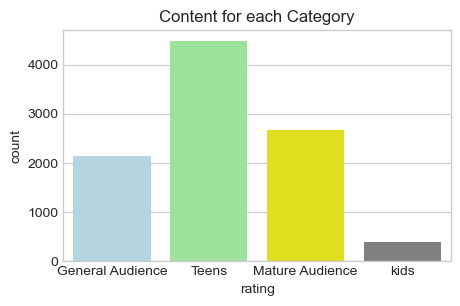

In [146]:
plt.figure(figsize=(5,3))
sns.countplot(x = 'rating',data = prime,palette=['lightblue','lightgreen','yellow','grey'])
plt.title("Content for each Category")

Analysis : There are more content for TEENS 

# Relation Between Rating and Types

Text(0.5, 1.0, 'Movies and TV Shows for each Rating')

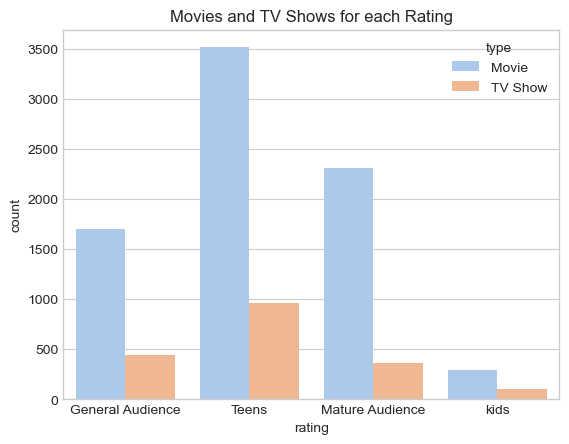

In [148]:
sns.countplot(x = 'rating',data = prime,hue="type",palette="pastel")
plt.title("Movies and TV Shows for each Rating")

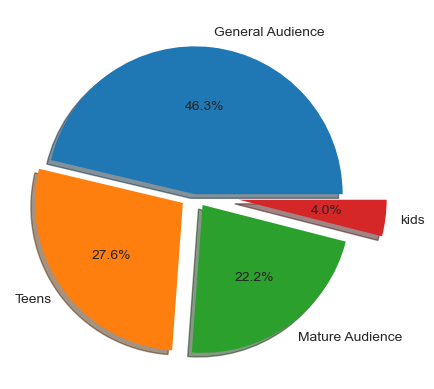

In [160]:
plt.pie(x = prime['rating'].value_counts(),labels=prime['rating'].unique(),shadow= True,autopct='%.1f%%',explode=[0.0,0.1,0.09,0.3])
plt.show()